In [ ]:
# i have taken a simple dataset for logistic regression model.

In [ ]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df = df.drop(["PassengerId", "Cabin", "Ticket"], axis=1)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

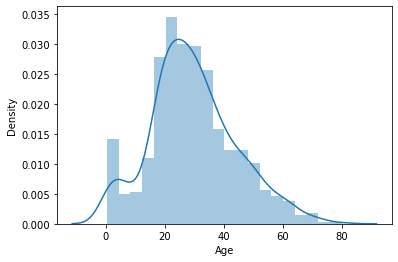

In [11]:
import seaborn as sns

sns.distplot(df["Age"])

In [12]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
df["Age"] = df["Age"].fillna(28.0)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [18]:
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")
df["Sex"] = df["Sex"].astype("category")
df["SibSp"] = df["SibSp"].astype("category")
df["Parch"] = df["Parch"].astype("category")
df["Embarked"] = df["Embarked"].astype("category")

In [19]:
df.dtypes

Survived    category
Pclass      category
Sex         category
Age          float64
SibSp       category
Parch       category
Fare         float64
Embarked    category
dtype: object

In [20]:
df_cat = df.select_dtypes(include="category")
df_num = df.select_dtypes(exclude="category")

In [21]:
df_cat.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


In [22]:
df_cat = df_cat.drop("Survived",axis=1)

In [23]:
df_num.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [25]:
sc= MinMaxScaler()
df_num_1 = sc.fit_transform(df_num)

In [26]:
df_num_sc = pd.DataFrame(df_num_1, index = df_num.index, columns=df_num.columns)

In [27]:
df_cat_dum = pd.get_dummies(df_cat)

In [28]:
df_cat_dum.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [29]:
df_num_sc.head()

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


In [30]:
df_final = pd.concat([df_cat_dum, df_num_sc],axis=1)

In [31]:
df_final.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,Age,Fare
0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0.271174,0.014151
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0.472229,0.139136
2,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0.321438,0.015469
3,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0.434531,0.103644
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0.434531,0.015713


In [32]:
x = df_final
y = df["Survived"]

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 100)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [36]:
pred = lr.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [38]:
accuracy_score(y_test, pred)

0.8146067415730337

In [39]:
accuracy_score(y_train, lr.predict(x_train))

0.8030942334739803

In [40]:
confusion_matrix(y_test, pred)

array([[97, 17],
       [16, 48]], dtype=int64)

In [41]:
## roc curve

y_prob = lr.predict_proba(x_test)

In [42]:
fpr,tpr,thresh = roc_curve(y_test, y_prob[:,1])

In [43]:
au = roc_auc_score(y_test, y_prob[:,1])

In [44]:
import matplotlib.pyplot as plt

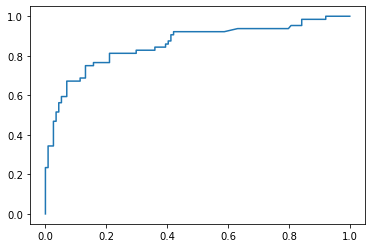

In [45]:
plt.plot(fpr,tpr,au)

In [46]:
au

0.8575932017543859